In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im_path = "building.jpg" 
im_src  = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)

(<matplotlib.image.AxesImage at 0x21e5750d3f0>, Text(0.5, 1.0, 'sobel'))

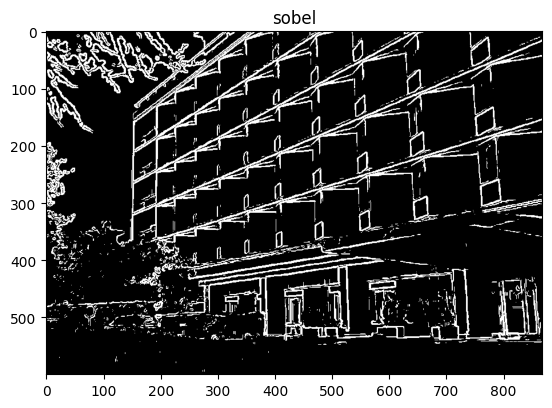

In [3]:
def sobel_edge(im_gray, T):

    #1 dx, dy
    gx = cv2.Sobel(im_gray, cv2.CV_32F, 1, 0, ksize = 3)  # x order = 1 only 
    gy = cv2.Sobel(im_gray, cv2.CV_32F, 0, 1, ksize = 3)  # y 
    #print("gx:", gx.dtype, gx.shape)
    
    dstM   = cv2.magnitude(gx, gy) # need  CV_32F or CV_64F
    _, im_bin = cv2.threshold(dstM.astype(np.uint16), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return dstM, im_bin.astype(np.uint8)

im_mag, im_sobel = sobel_edge(im_src, T = 127)
plt.imshow(im_sobel, cmap="gray"), plt.title('sobel')

In [4]:
im_canny1 = cv2.Canny(im_src, threshold1= 127, threshold2 = 127)

(<matplotlib.image.AxesImage at 0x21e57777430>, Text(0.5, 1.0, 'canny'))

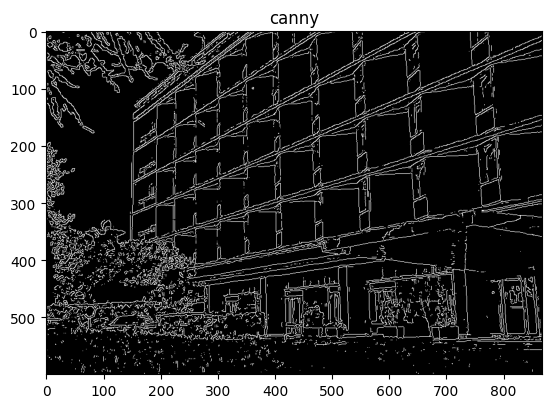

In [5]:
 plt.imshow(im_canny1, cmap="gray"), plt.title('canny')

In [6]:
im_canny2 = cv2.Canny(im_src, threshold1= 61, threshold2 = 127)

(<matplotlib.image.AxesImage at 0x21e5782e0b0>, Text(0.5, 1.0, 'canny'))

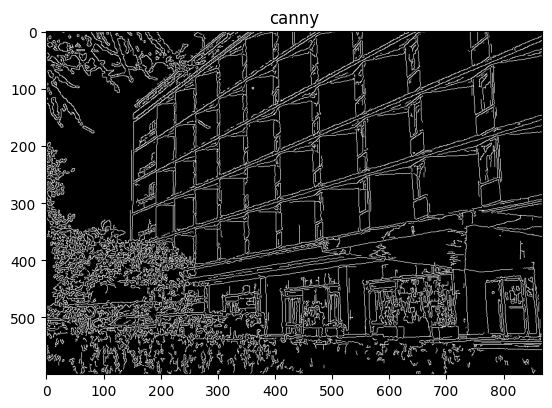

In [7]:
plt.imshow(im_canny2, cmap="gray"), plt.title('canny')

(<Axes: title={'center': 'canny'}>,
 Text(0.5, 1.0, 'canny'))

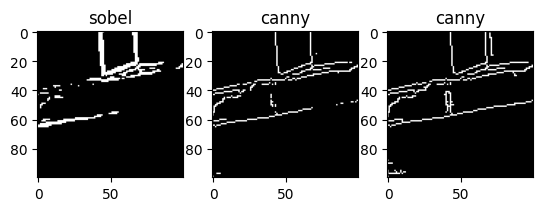

In [8]:
plt.subplot(1,3,1), plt.imshow(im_sobel[300:400, 600:700], cmap="gray"), plt.title('sobel')
plt.subplot(1,3,2), plt.imshow(im_canny1[300:400, 600:700], cmap="gray"), plt.title('canny')
plt.subplot(1,3,3), plt.imshow(im_canny2[300:400, 600:700], cmap="gray"), plt.title('canny')

In [9]:
# 1. making a black image
im = np.zeros([500, 500, 3], dtype= np.uint8)

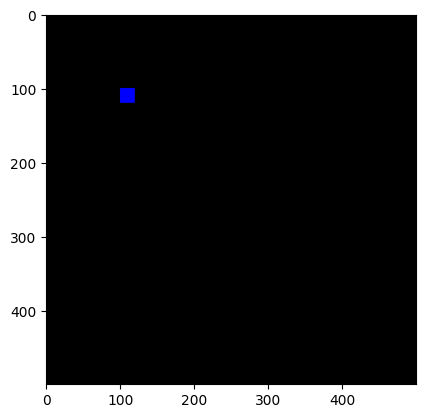

In [10]:
im[100:120,100:120] = (0, 0, 255)
plt.imshow(im)

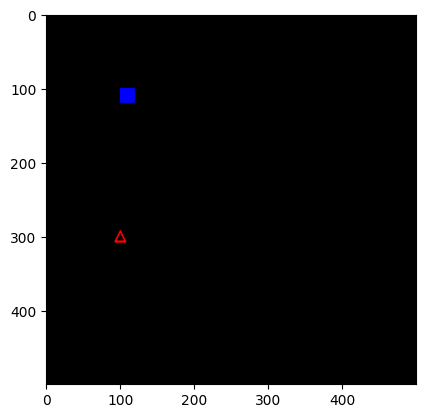

In [11]:
pos = (100, 300) # (x, y)
im = cv2.drawMarker(im, pos, (255,0,0), cv2.MARKER_TRIANGLE_UP, markerSize=15,thickness=2)
plt.imshow(im)

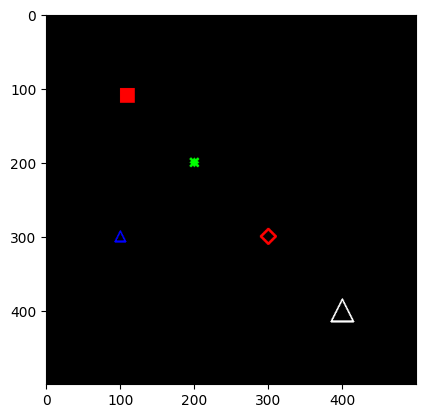

In [12]:
pos = (200,200)
im = cv2.drawMarker(im,  pos, (0,255,0), markerType = cv2.MARKER_STAR, markerSize=10,thickness=2)
pos = (300,300)
im = cv2.drawMarker(im, pos,  (0, 0, 255), markerType = cv2.MARKER_DIAMOND, markerSize=20,thickness=2)
pos = (400,400)
im = cv2.drawMarker(im, pos,  (255, 255, 255), markerType = cv2.MARKER_TRIANGLE_UP, markerSize=30,thickness=2)
plt.imshow(im[:,:,::-1])

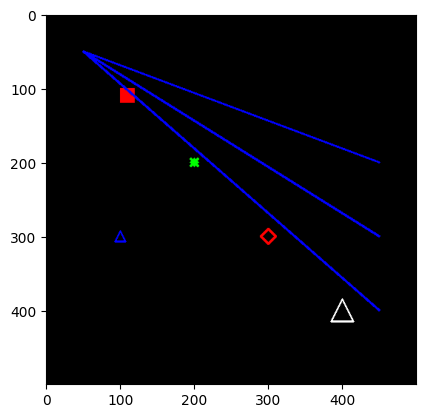

In [15]:
pt1 = (50, 50)
pt2 = (450, 400)
im = cv2.line(im, pt1, pt2, color =(255,0,0), thickness=2)
plt.imshow(im[:,:,::-1])

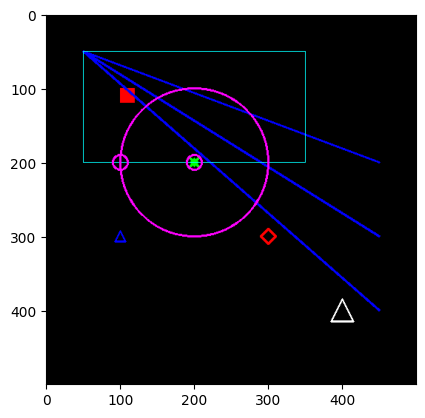

In [26]:
center = (200, 200)
im = cv2.circle(im, center, 100, color =(255,0,255), thickness=2)
plt.imshow(im[:,:,::-1])

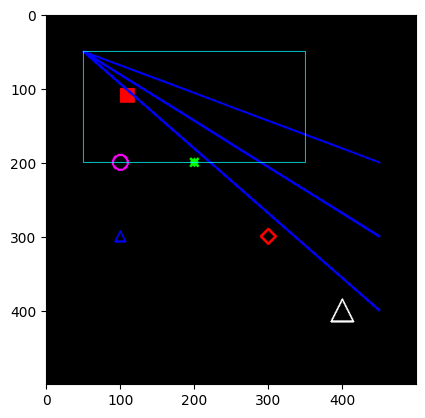

In [23]:
pt1 = (50, 50)
pt2 = (350, 200)
im = cv2.rectangle(im, pt1, pt2, color = (255,255,0), thickness=1)
plt.imshow(im[:,:,::-1])

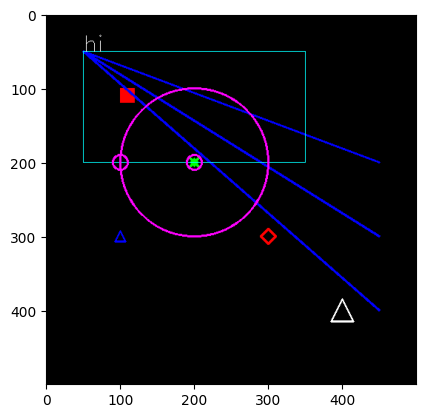

In [27]:
pt1 = (50, 50)
pt2 = (350, 200)
im = cv2.putText(im, "hi", pt1, fontFace = cv2.FONT_ITALIC , fontScale = 1, color =(255,255,255))
plt.imshow(im[:,:,::-1])